<a href="https://colab.research.google.com/github/Lithikhaa/neural_network/blob/main/neural_networks_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

In [ ]:
df=pd.read_csv("heart.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.notnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1021,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1022,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1023,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


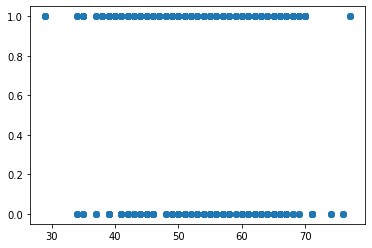

In [ ]:
plt.scatter(df['age'],df['sex'])
plt.show()

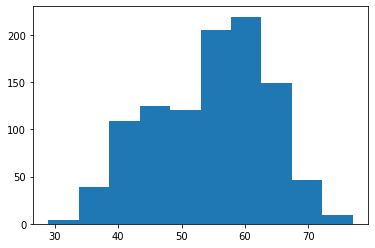

In [ ]:
plt.hist(df['age'])
plt.show()

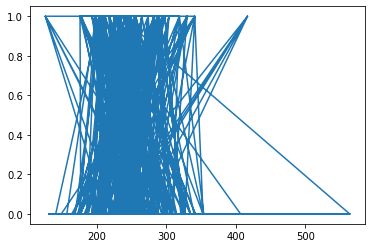

In [ ]:
plt.plot(df['chol'],df['fbs'])
plt.show()

In [ ]:
x= df.drop('target', axis=1)
y= df['target']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

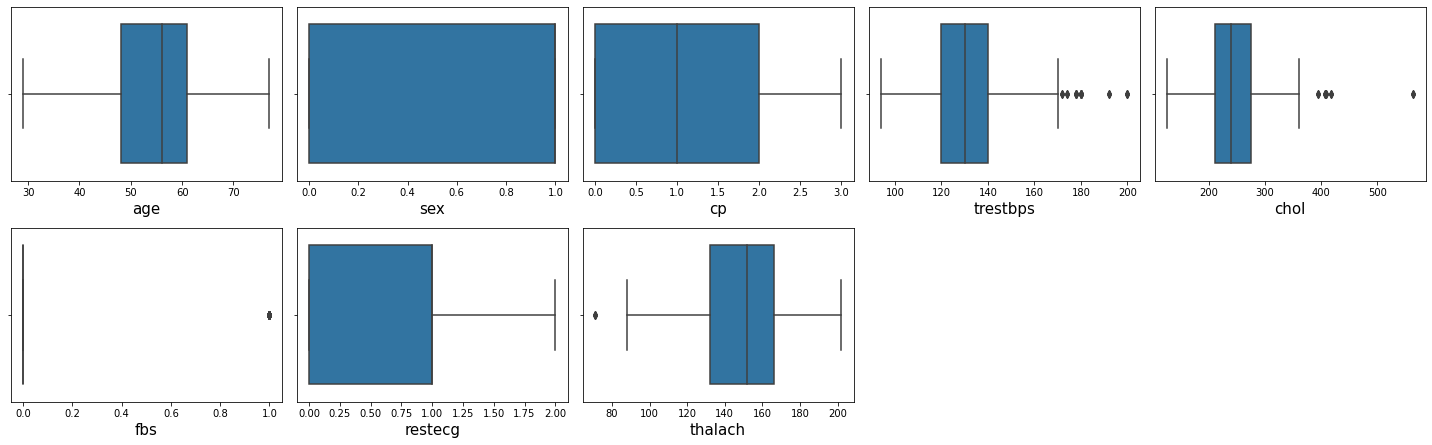

In [ ]:
plt.figure(figsize=(20,15))
plotnumber =1

for col in x.columns:
  if plotnumber<=8:
    ax=plt.subplot(5,5, plotnumber)
    sns.boxplot(x[col])
    plt.xlabel(col, fontsize =15)

  plotnumber +=1
plt.tight_layout()
plt.show()

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=4)

In [ ]:
a= StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",random_state=0)

clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[132,   0],
       [  0, 125]])

In [ ]:
accuracy_score(y_test,y_pred)


1.0

In [ ]:
learning_rate=0.1
iterations=5000
N=y_train.size

In [ ]:
input_size=13

In [ ]:
hidden_size=2

In [ ]:
output_size=3

In [ ]:
results=pd.DataFrame(columns=["mse","accuracy"])

In [ ]:
np.random.seed(10)

In [ ]:
W1=np.random.normal(scale=0.5,size=(input_size,hidden_size))

In [ ]:
W2=np.random.normal(scale=0.5,size=(hidden_size,output_size))

In [ ]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

In [ ]:
def mean_squared_error(y_pred,y_true):
  return((y_pred-y_true)**2).sum() / (2*y_pred.size)

In [ ]:
def accuracy(y_pred,y_true):
  acc=y_pred.argmax(axis=1)==y_true.argmax(axis=1)
  return acc.mean()

In [ ]:
for itr in range(iterations):
  Z1=np.dot(x_train,W1)
  A1=sigmoid(Z1)

In [ ]:
Z2=np.dot(A1,W2)
A2=sigmoid(Z2)

In [ ]:
yt=np.array(y_train).reshape(768,1)

In [ ]:
mse=mean_squared_error(A2,yt)
acc=accuracy(A2,yt)
results=results.append({"mse":mse,"accuracy":acc},ignore_index=True)

In [ ]:
E1=A2 - yt
dW1=E1 * A2 * (1 - A2)

In [ ]:
for itr in range(iterations):
  Z1 = np.dot(x_train,W1)
  A1 = sigmoid(Z1)
  Z2 =np.dot(A1,W2)
  A2 =sigmoid(Z2)
  mse= mean_squared_error(A2,yt)
  acc =accuracy(A2,yt)
  results=results.append({"mse":mse,"accuracy":acc},ignore_index=True)
  E1 = A2 - yt
  dW1 = E1 * A2 * (1-A2)
  E2 = np.dot(dW1,W2.T)
  dW2 = E2 * A1 * (1-A1)
  W2_update = np.dot(A1.T,dW1) / N
  W1_update = np.dot(x_train.T,dW2) / N
  W2 = W2 - learning_rate * W2_update
  w1 = W1-learning_rate * W1_update

<AxesSubplot:title={'center':'Mean Squared Error'}>

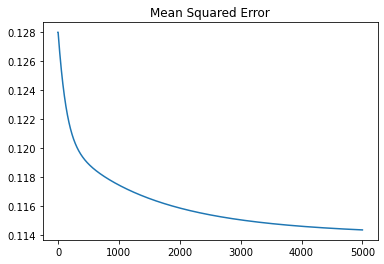

In [ ]:
results.mse.plot(title = "Mean Squared Error")


<AxesSubplot:title={'center':'Accuracy'}>

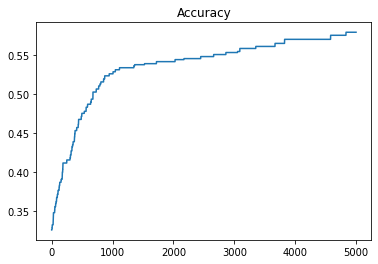

In [ ]:
results.accuracy.plot(title="Accuracy")